In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [4]:
def plotbar(df,col,color,order,xlabel,ylabel,title,orient):
    if(orient=='v'):
        sns.catplot(data=df,x=col,kind='count',color=color,order=order,
                height=11, aspect=12/11)
    elif(orient=='h'):
        sns.catplot(data=df,y=col,kind='count',color=color,order=order,
                height=11, aspect=12/11)
    plt.xlabel(xlabel,fontsize=14,labelpad=10,weight='bold')
    plt.ylabel(ylabel,fontsize=14,labelpad=30,weight='bold')
    plt.title(title,fontsize=20,pad=20,weight='bold',family='serif')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)

## What is the safest place and time to drive in USA ?

### Exploring the data

In [5]:
df = pd.read_csv("df.csv")
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5000 non-null   object 
 1   Severity               5000 non-null   int64  
 2   Start_Time             5000 non-null   object 
 3   End_Time               5000 non-null   object 
 4   Start_Lat              5000 non-null   float64
 5   Start_Lng              5000 non-null   float64
 6   End_Lat                4506 non-null   float64
 7   End_Lng                4506 non-null   float64
 8   Distance(mi)           5000 non-null   float64
 9   Description            5000 non-null   object 
 10  Number                 1697 non-null   float64
 11  Street                 5000 non-null   object 
 12  Side                   5000 non-null   object 
 13  City                   4999 non-null   object 
 14  County                 5000 non-null   object 
 15  Stat

In [8]:
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.Country.value_counts()

US    5000
Name: Country, dtype: int64

 ###  Is the *Severity* column a good indicator of the impact of the accident ?

In [10]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['time_diff'] = (df.End_Time-df.Start_Time ).astype('timedelta64[m]')
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,time_diff
0,A-2283743,2,2019-02-19 08:02:58+00:00,2019-02-19 08:32:22+00:00,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,Day,Day,Day,Day,29.0
1,A-1567861,2,2017-02-13 20:51:52+00:00,2017-02-13 21:21:39+00:00,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,Night,Night,Night,Night,29.0
2,A-423709,2,2020-05-22 18:20:00+00:00,2020-05-22 19:11:35+00:00,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,True,False,Day,Day,Day,Day,51.0
3,A-864136,2,2020-03-03 07:47:18+00:00,2020-03-03 09:17:12+00:00,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,Day,Day,Day,Day,89.0
4,A-2792470,2,2020-01-22 08:05:34+00:00,2020-01-22 12:05:34+00:00,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,240.0


In [11]:
df.time_diff.sort_values()

710          6.0
3875         6.0
1201        12.0
2213        13.0
4596        15.0
          ...   
3828      3400.0
3081      3988.0
2692      6592.0
2717     15601.0
3798    143960.0
Name: time_diff, Length: 5000, dtype: float64

Text(0.5, 1.0, 'Time accident affected road (less than 2 hours) against distance length affected by accident')

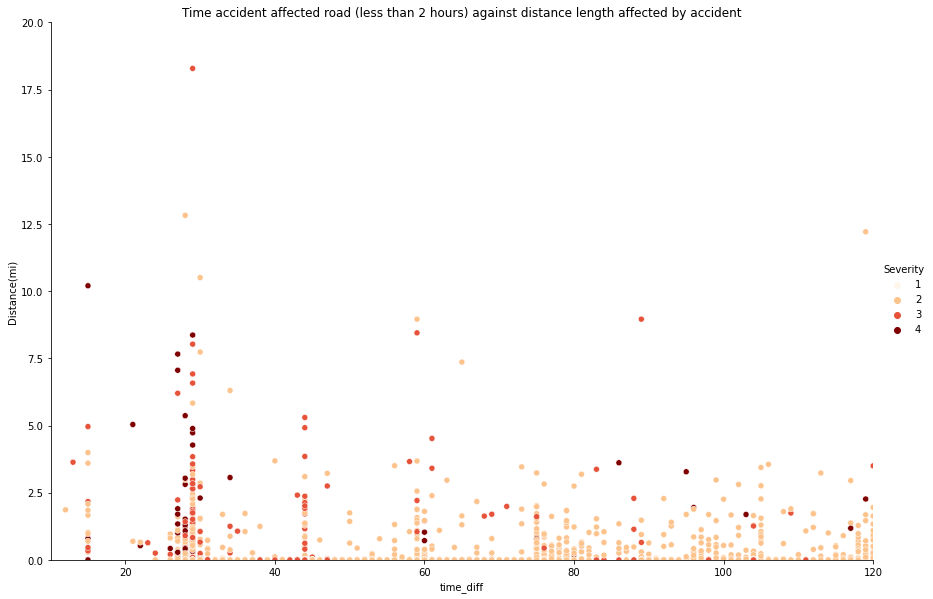

In [12]:
sns.relplot(data=df,x='time_diff',y='Distance(mi)', hue="Severity",palette='OrRd',height=8, aspect=12/8)
plt.xlim(10,120)
plt.ylim(0,20)
plt.title('Time accident affected road (less than 2 hours) against distance length affected by accident')

Text(0.5, 1.0, 'Time accident affected road (more than 2 hours) against distance length affected by accident')

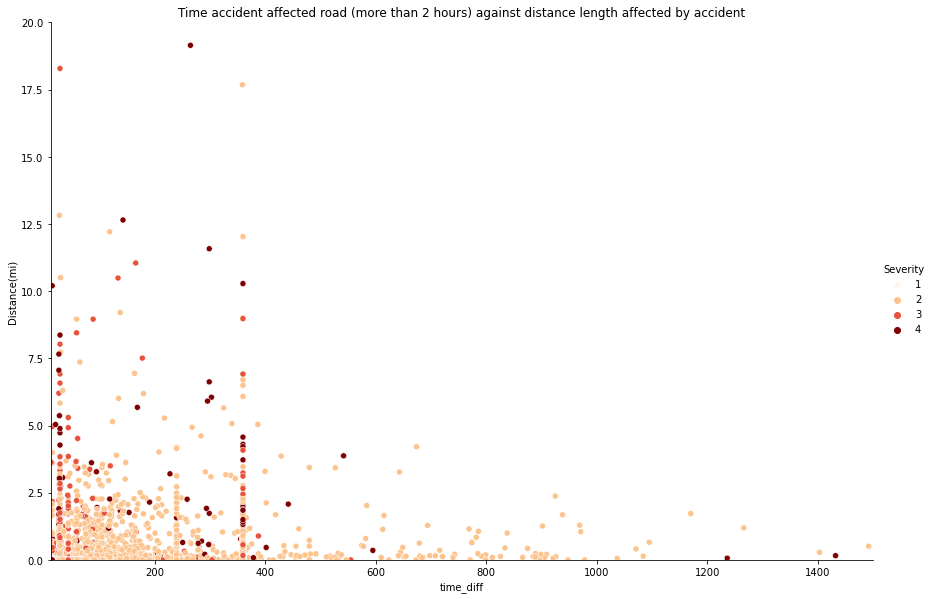

In [132]:
sns.relplot(data=df,x='time_diff',y='Distance(mi)', hue="Severity",palette='OrRd',height=8, aspect=12/8)
plt.xlim(12,1500)
plt.ylim(0,20)
plt.title('Time accident affected road (more than 2 hours) against distance length affected by accident')

Text(0.5, 1.0, 'Time accident affected road against distance length affected by accident less than 1 mile')

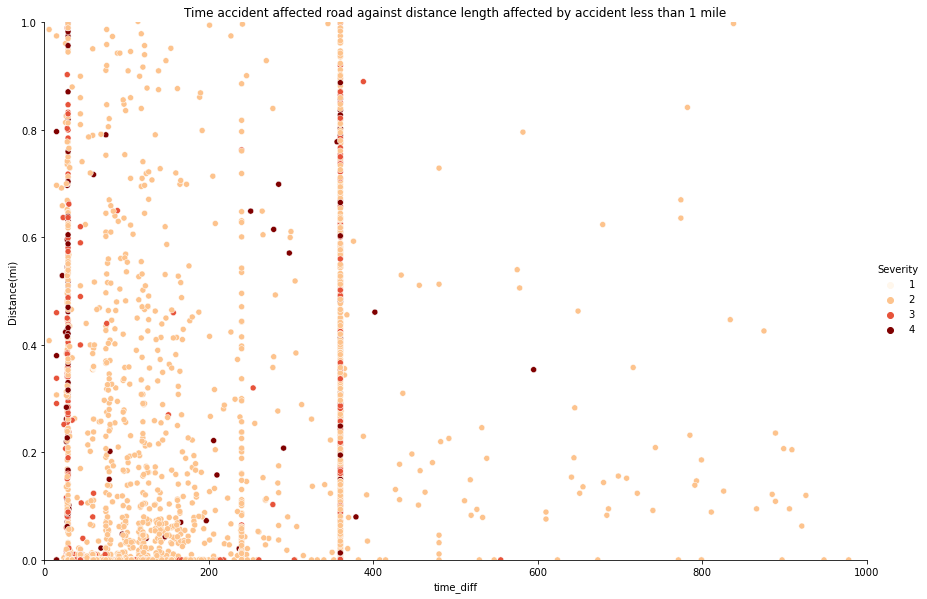

In [13]:
sns.relplot(data=df,x='time_diff',y='Distance(mi)', hue="Severity",palette='OrRd',height=8, aspect=12/8)
plt.xlim(0,1000)
plt.ylim(0,1)
plt.title('Time accident affected road against distance length affected by accident less than 1 mile')

Text(0.5, 1.0, 'Time accident affected road against distance length affected by accident more than 1 mile')

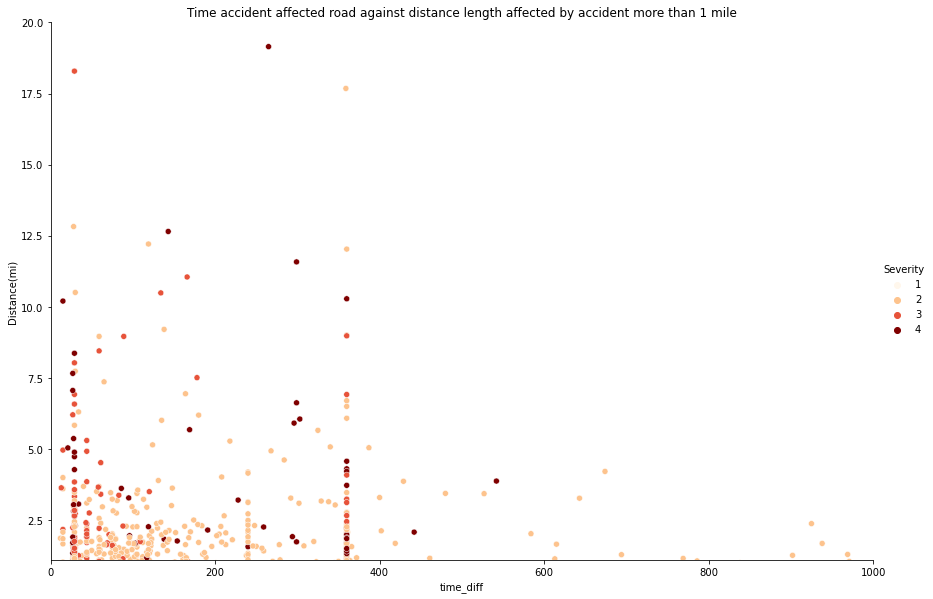

In [14]:
sns.relplot(data=df,x='time_diff',y='Distance(mi)', hue="Severity",palette='OrRd',height=8, aspect=12/8)
plt.xlim(0,1000)
plt.ylim(1.1,20)
plt.title('Time accident affected road against distance length affected by accident more than 1 mile')

In [15]:
df['effect'] = df['Distance(mi)'] * df.time_diff

> The effect column is an interaction between the distance and duration, the bigger the value the bigger the effect of the accident on the road 

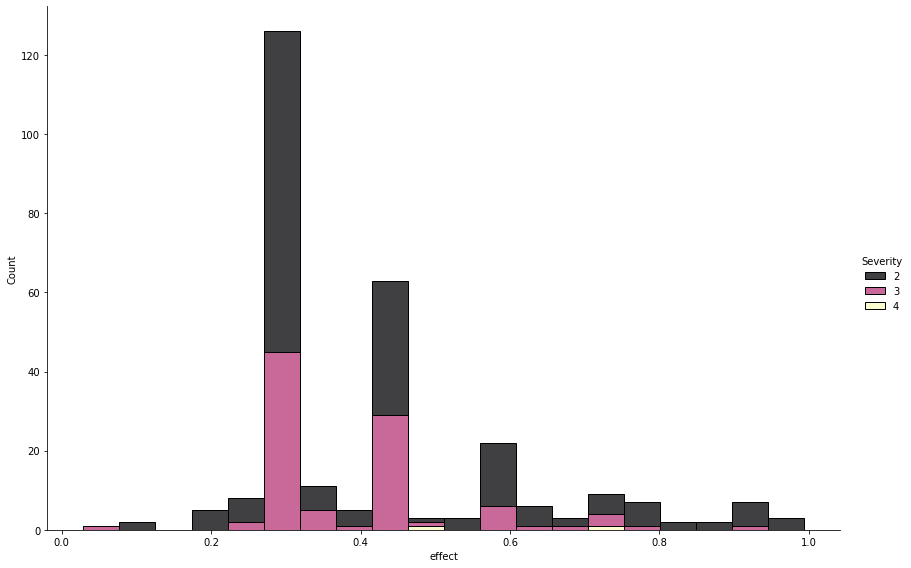

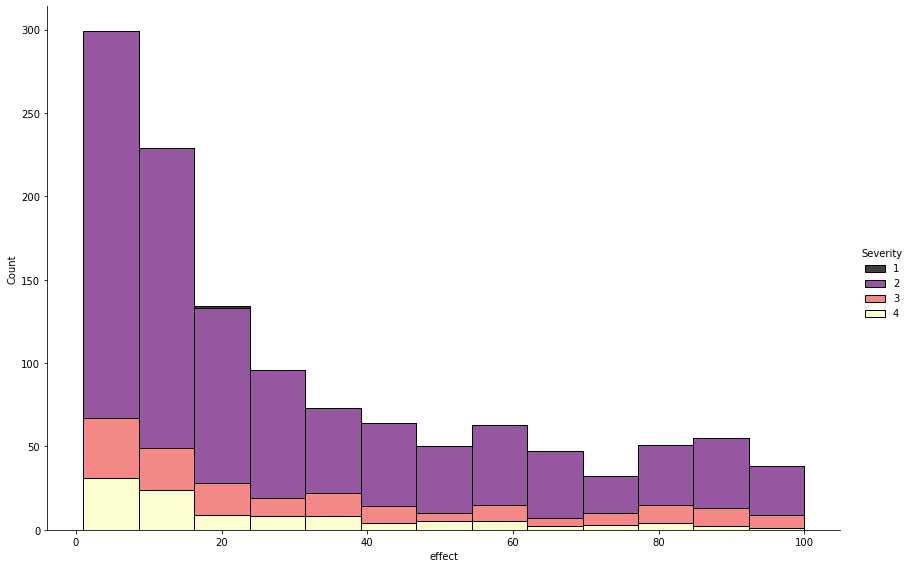

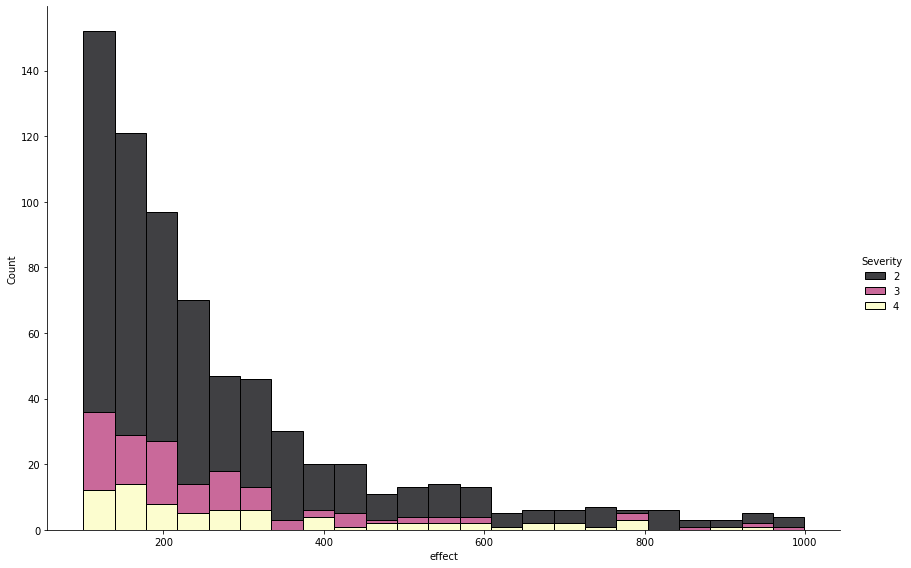

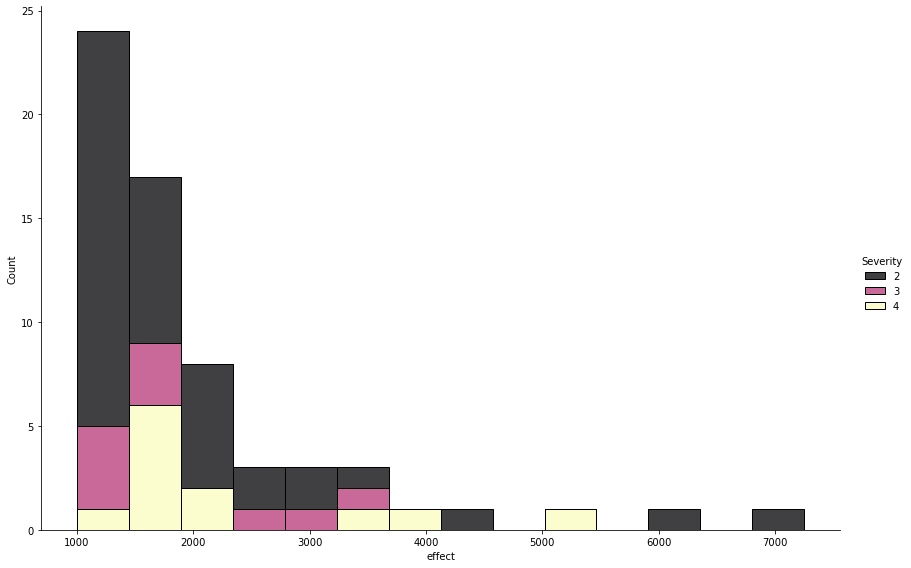

In [16]:
query1 = df.query('effect > 0 and effect <= 1')
sns.displot(data=query1,x='effect',height=8,aspect=12/8,kind='hist',hue='Severity',
            multiple='stack',palette='magma')
query2 = df.query('effect > 1 and effect < 100')
sns.displot(data=query2,x='effect',height=8,aspect=12/8,kind='hist',hue='Severity',multiple='stack',palette='magma')
query3 = df.query('effect >= 100 and effect < 1000')
sns.displot(data=query3,x='effect',height=8,aspect=12/8,kind='hist',hue='Severity',multiple='stack',palette='magma')
query4 = df.query('effect >= 1000 and effect < 10000 ')
sns.displot(data=query4,x='effect',height=8,aspect=12/8,kind='hist',hue='Severity',multiple='stack',palette='magma')

In [17]:
default = sns.color_palette()[0]

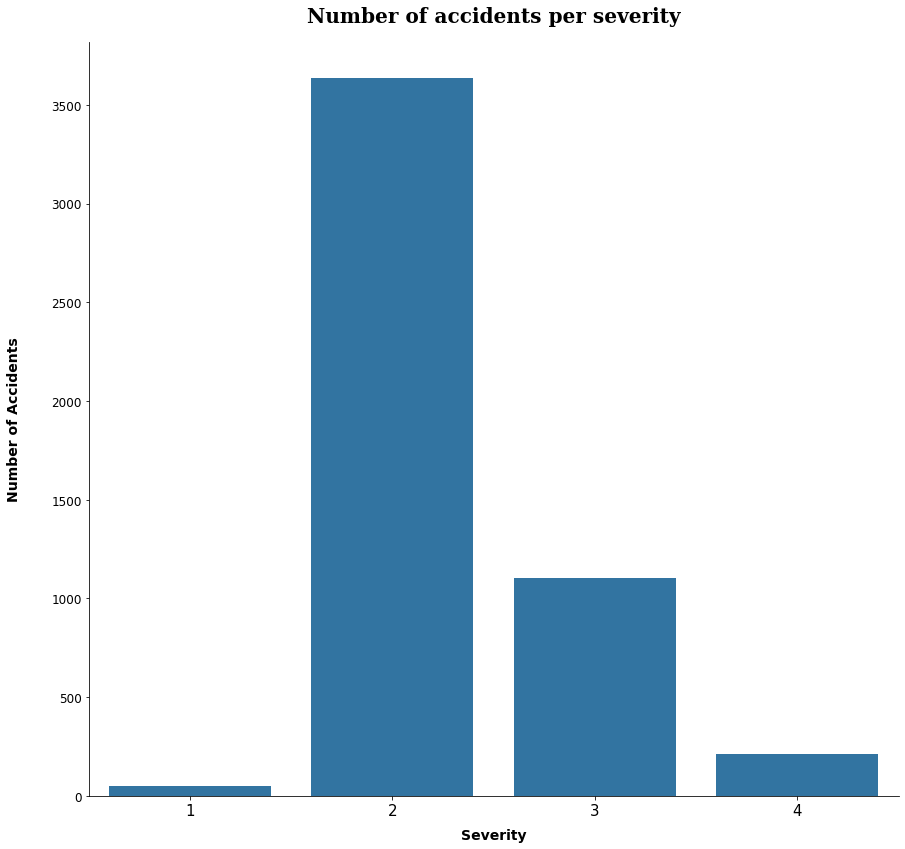

In [19]:
plotbar(df,'Severity',default,None,'Severity','Number of Accidents','Number of accidents per severity','v')

### Conclusions
- it is clear from the above graphs that the Severity metric isn't accurate at all to represent the impact of the accident on the road as it doesn't have correlation with the effect, duration or distance
- Severity 2 is labeled much more than other categories even when both distance affected and duration are long or short
- Severity 1 is nearly non-exsistent even when both distance affected and duration covered are short

> for the sake of the analysis in this notebook, we will use severity as a metric for the impact of the accident

### What is the distribution of accidents per states ?

In [20]:
states_accidents = df.State.value_counts()
states_accidents

CA    1265
FL     428
TX     386
NY     244
SC     213
NC     209
OR     191
MN     151
PA     144
VA     134
GA     133
MI     124
AZ     117
IL     109
LA      97
NJ      93
MD      93
TN      88
UT      86
OH      86
WA      74
OK      60
CO      60
AL      56
IN      43
CT      39
MO      37
MA      36
NE      26
WI      24
KY      19
IA      17
MS      14
NV      14
KS      12
NH      12
RI      10
ID       9
NM       8
DC       7
AR       7
ME       7
DE       6
WV       5
MT       4
WY       2
ND       1
Name: State, dtype: int64

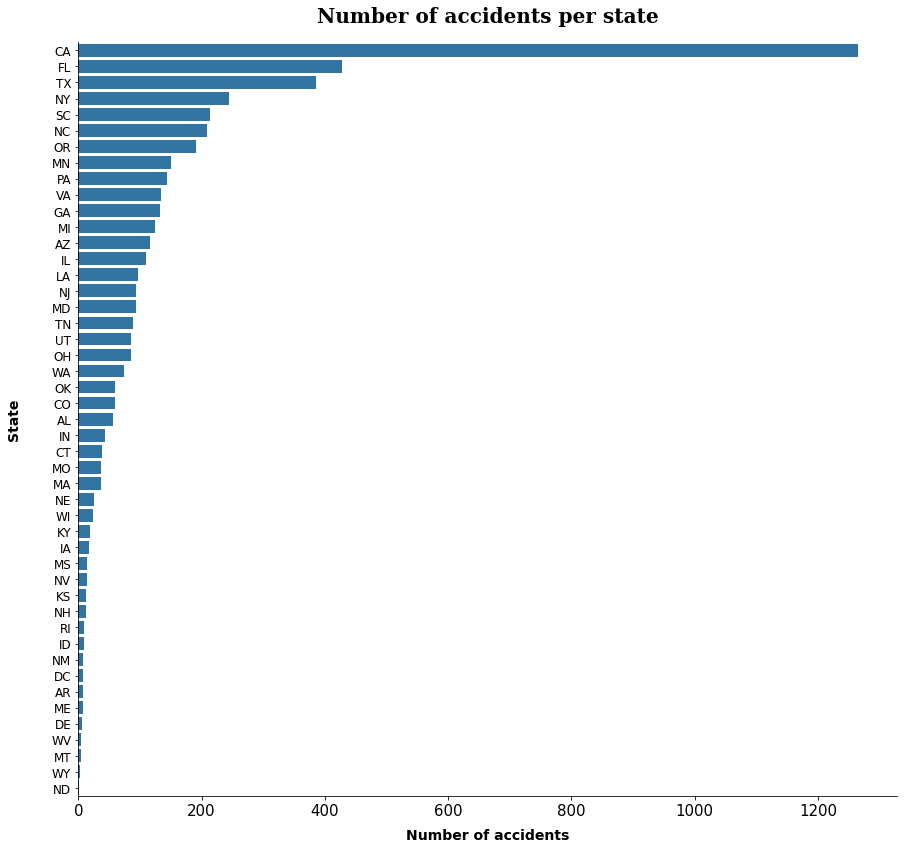

In [21]:
plotbar(df,'State',default,states_accidents.index,'Number of accidents','State','Number of accidents per state','h')

In [22]:
ca_state = df[df.State == 'CA']
counties_ca = ca_state.County.value_counts()
counties_ca

Los Angeles        377
Alameda             85
Orange              83
Sacramento          82
San Bernardino      78
San Diego           75
Riverside           69
Santa Clara         61
Contra Costa        44
San Joaquin         32
San Mateo           29
Kern                28
Fresno              18
Ventura             18
Stanislaus          15
San Francisco       14
Monterey            14
Solano              13
Santa Barbara       10
Sonoma              10
San Luis Obispo      9
Marin                8
Yuba                 8
Placer               7
Tulare               6
Merced               6
Santa Cruz           6
Yolo                 5
Napa                 5
Nevada               5
El Dorado            5
Madera               4
Lake                 3
Tuolumne             3
Calaveras            3
Humboldt             3
Siskiyou             2
Shasta               2
Butte                2
San Benito           2
Kings                2
Tehama               2
Amador               2
Mendocino  

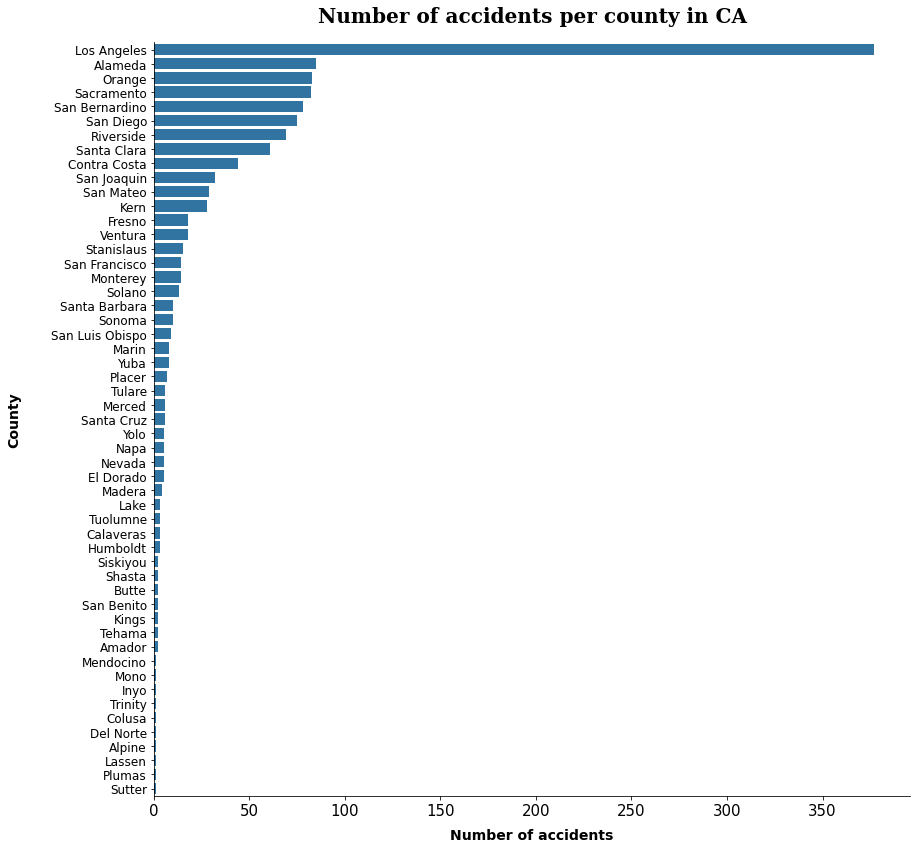

In [23]:
plotbar(ca_state,'County',default,counties_ca.index,'Number of accidents','County','Number of accidents per county in CA','h')

In [24]:
counties = df.County.value_counts()
counties

Los Angeles    377
Orange         147
Harris         119
Miami-Dade     111
Dallas         108
              ... 
Eau Claire       1
Outagamie        1
Bristol          1
Cortland         1
Atlantic         1
Name: County, Length: 533, dtype: int64

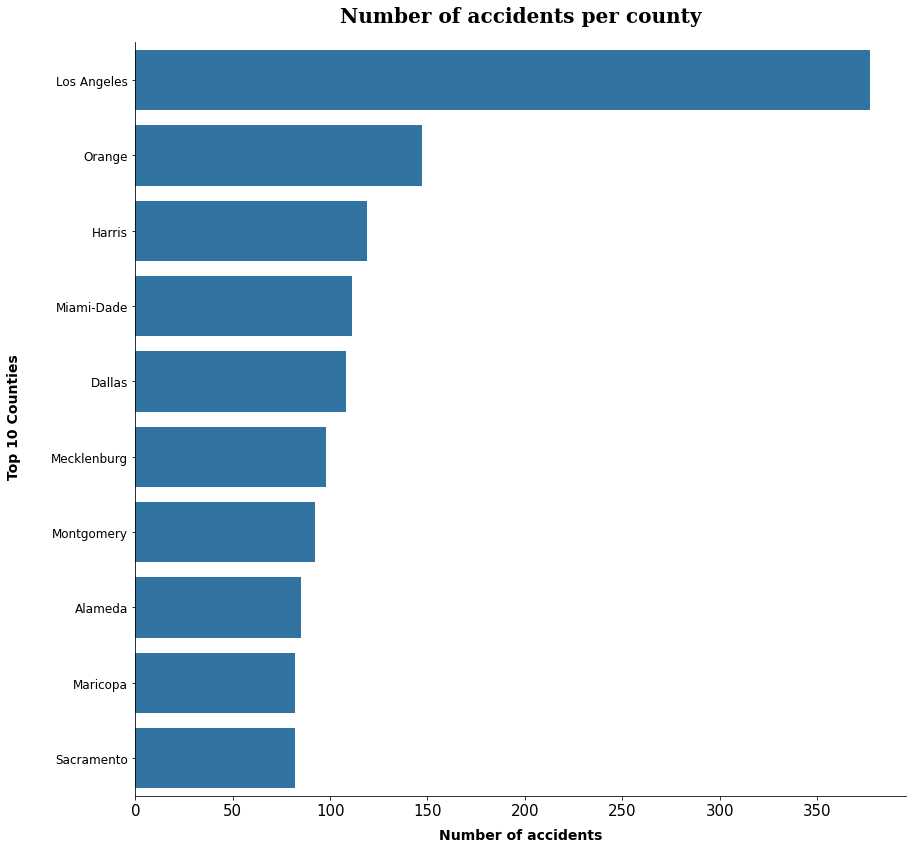

In [25]:
#sns.catplot(data=df,y='County',kind='count',color='blue',order=top_Counties.index[0:10])
plotbar(df,'County',default,counties.index[0:10],'Number of accidents',' Top 10 Counties','Number of accidents per county','h')

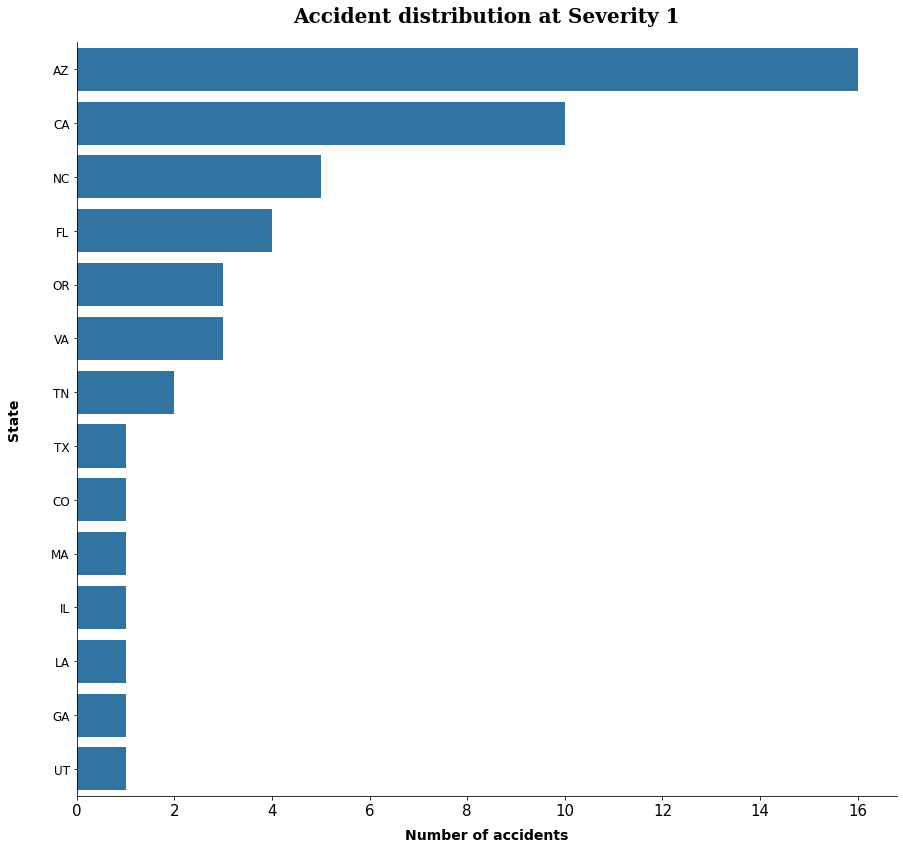

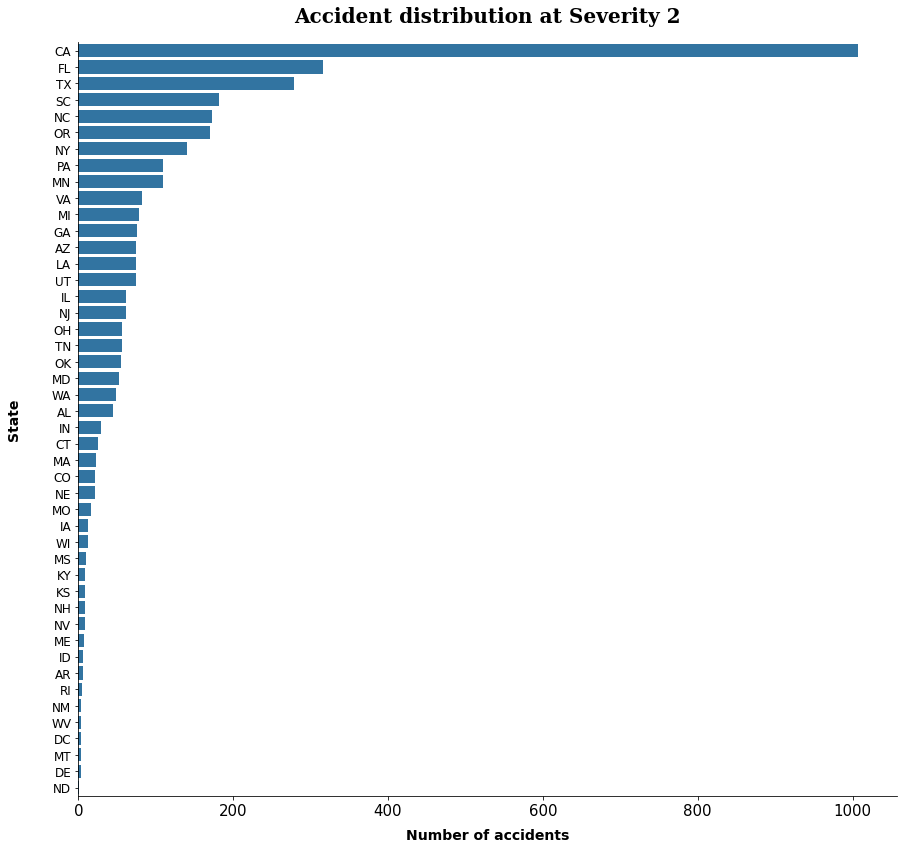

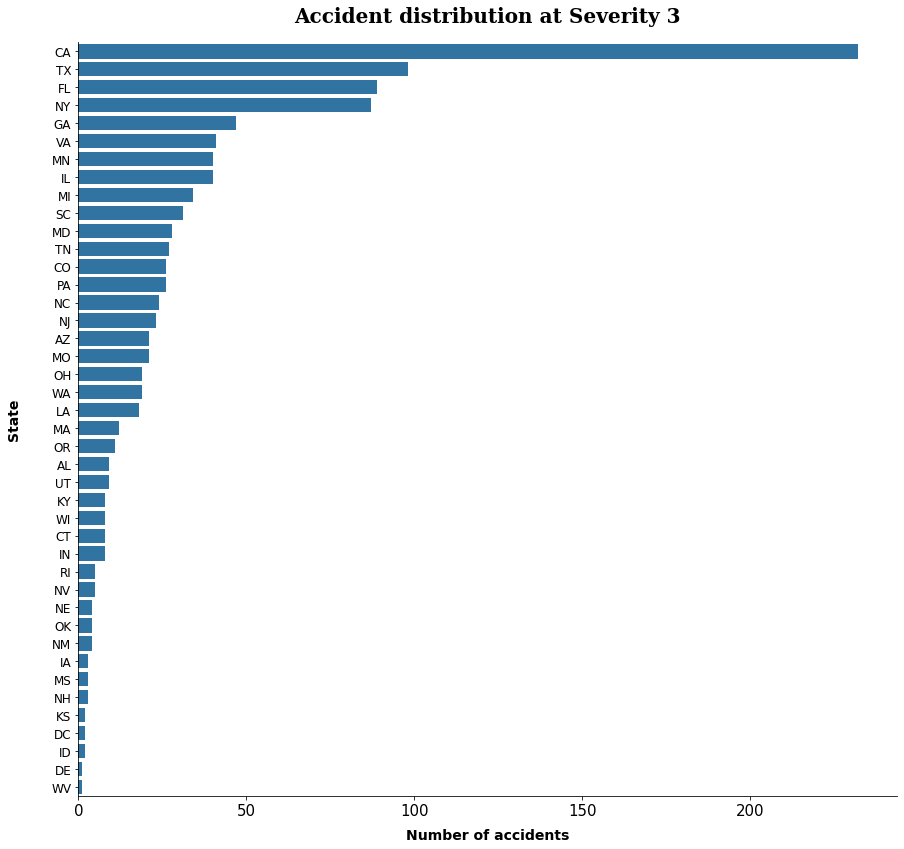

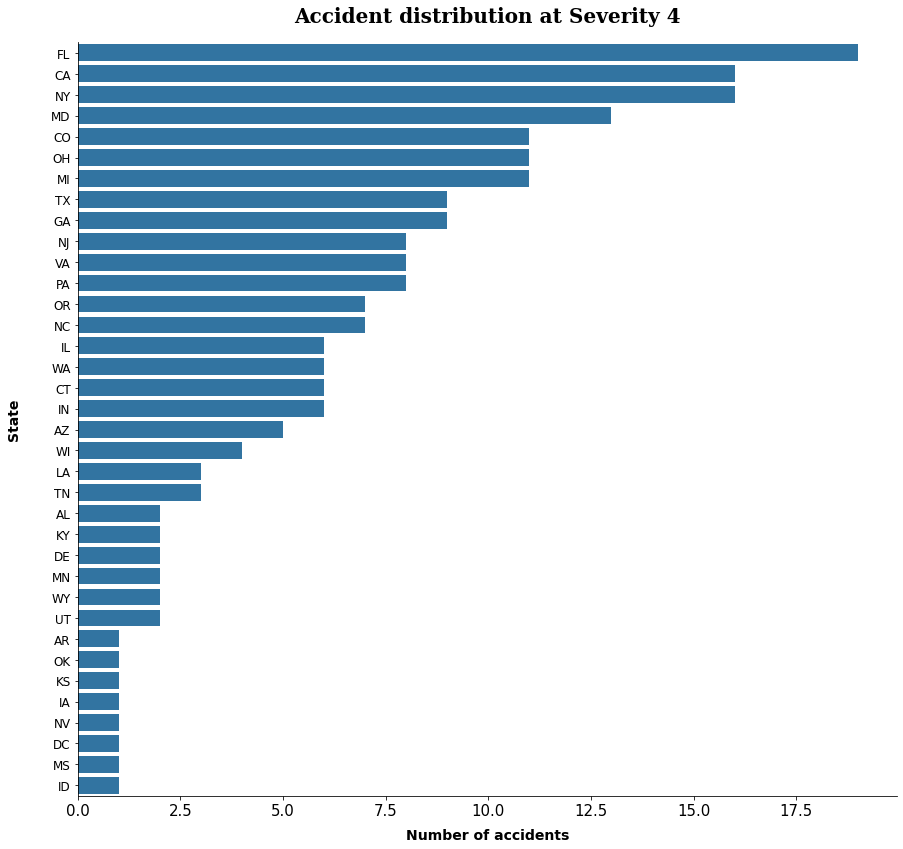

In [26]:
for severity in np.sort(df.Severity.unique()):
    high_severity  = df.query("Severity==@severity")
    high_severity_states = high_severity.State.value_counts()
    title = "Accident distribution at Severity {}".format(severity)
    plotbar(high_severity,'State',default,high_severity_states.index,'Number of accidents','State',title,'h')

### Distribution Map

In [27]:
states = gpd.read_file('cb_2018_us_state_5m.shp')
states_accidents = df.State.value_counts()
states_accidents = states_accidents.to_frame()
states_accidents['STUSPS'] = states_accidents.index
states_accidents.reset_index(inplace=True,drop=True)
states_accidents.info()
merged_df = pd.merge(states,states_accidents,how="left")
merged_df['State'] = merged_df['State'].fillna(0)
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   47 non-null     int64 
 1   STUSPS  47 non-null     object
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",26.0
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",74.0
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",8.0
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",0.0
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",386.0


Text(0.5, 1.0, 'Accidents severity and accidents number distribution per state')

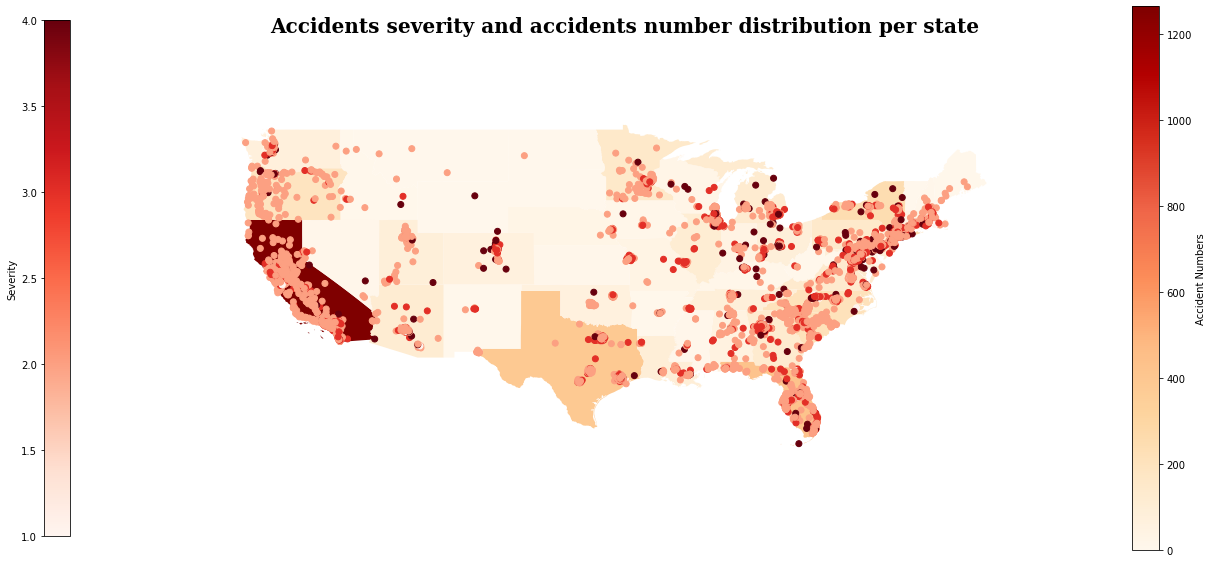

In [28]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   
ax = merged_df.plot(column='State',cmap='OrRd',legend=True,legend_kwds={'fraction':0.025,'label':'Accident Numbers',
                                                                    'location':'right'},figsize=(20,10))
gdf.plot(ax=ax, column='Severity',cmap='Reds',legend=True,legend_kwds={'fraction':0.025,'label':'Severity',
                                                                      'location':'left'})
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.axis('off')
plt.title('Accidents severity and accidents number distribution per state',size=20, pad = 20,family='serif',weight='bold')

### Conclusions
- From the map it is clear that there are lots of accidents in the east and west than in the center 
- Accidents in the east coast tend to be more severe than accidents on the west coast
- CA is the most dangerous state with Los Angeles being the most dangerous county in CA
- FL & NY have very high numbers of very severe accidents

### What are the most dangerous points of interest ?

In [29]:
pois = df.iloc[:,32:43]
pois_names = pois.columns
pois_names

Index(['Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [30]:
pois = df.groupby(df.Severity)[pois_names].sum()

In [31]:
pois

,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,,,,,,,,,,,
1,13,0,5,0,0,0,3,1,0,20,0
2,311,13,313,6,34,0,82,70,3,612,0
3,22,3,122,1,1,0,11,2,0,77,0
4,14,1,32,0,1,0,4,3,0,17,0


<Figure size 432x288 with 0 Axes>

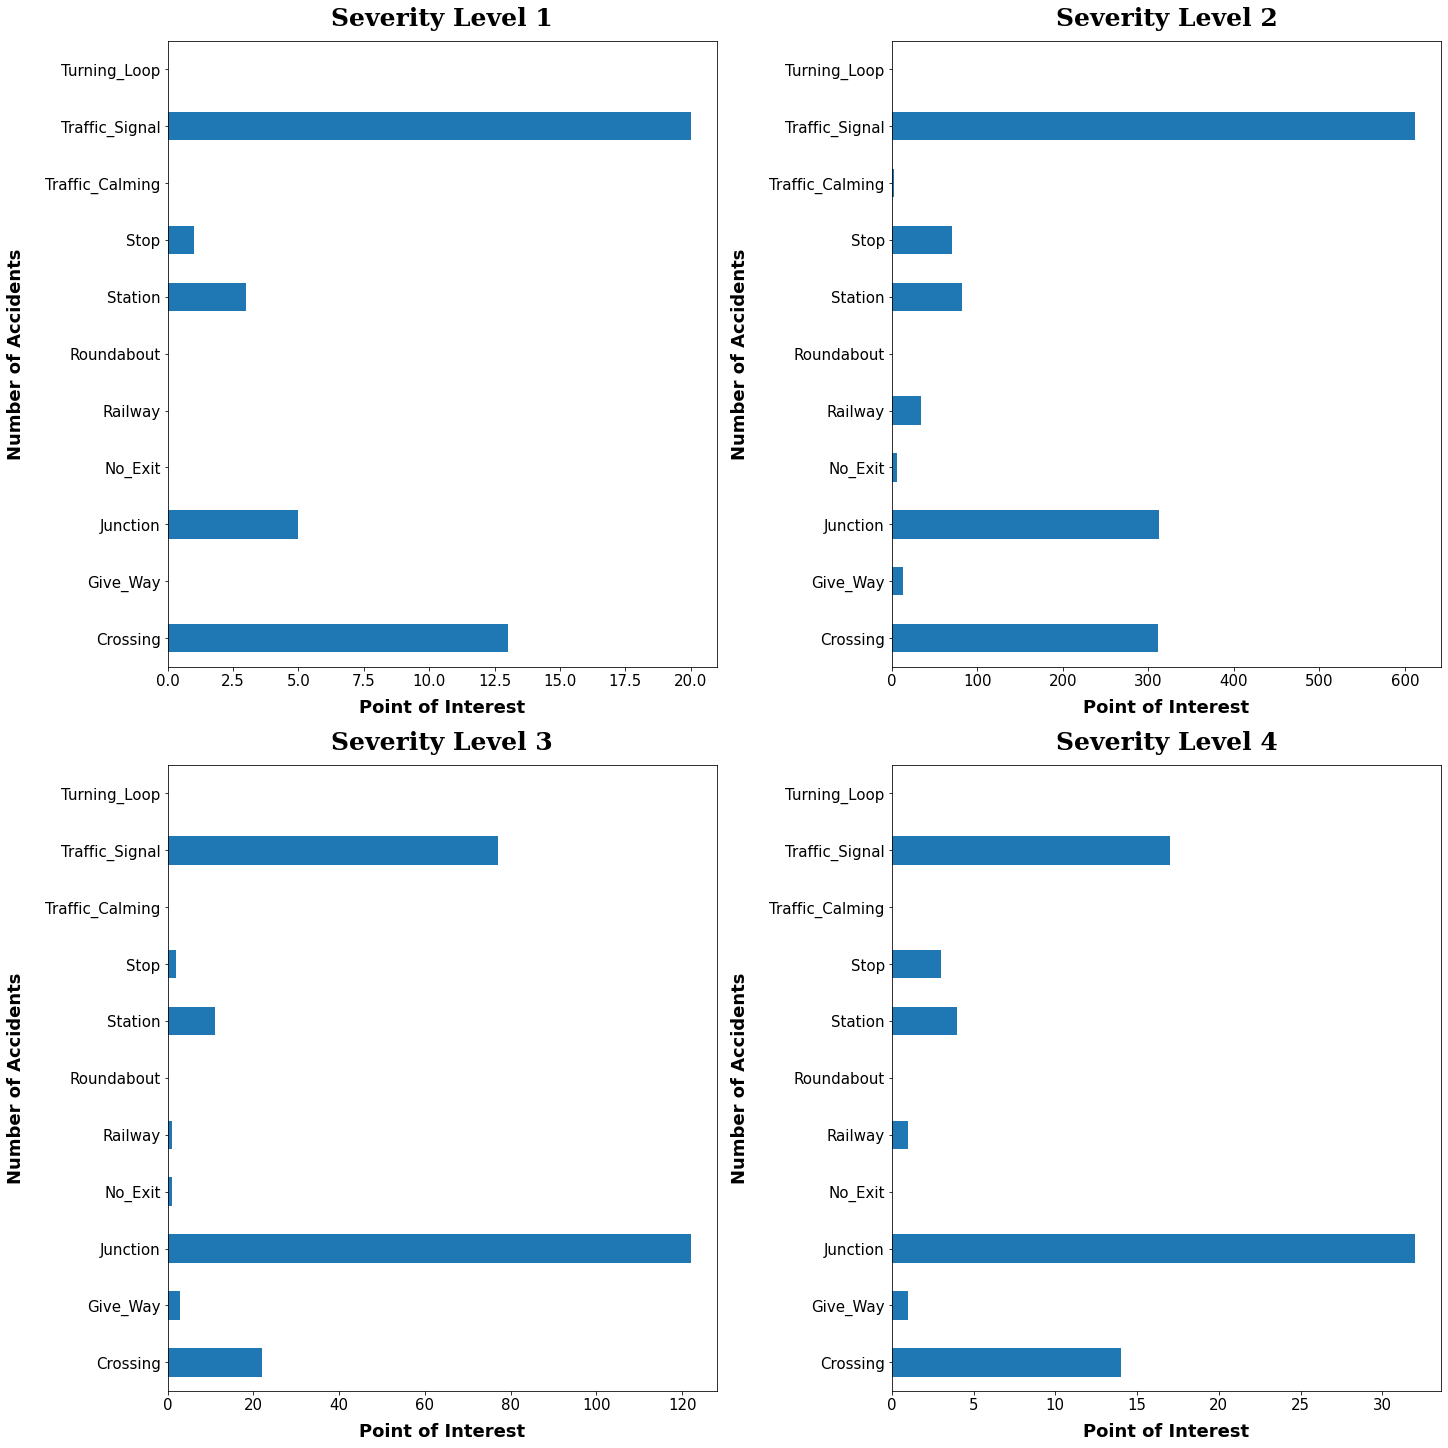

In [32]:
fig = plt.figure()
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
axes = axes.flatten()
for poi in pois.index:
    plt.sca(axes[poi-1])
    pois.iloc[poi-1].plot(kind='barh',figsize=(20,20))
    plt.title('Severity Level {}'.format(poi),pad=15,size=25,weight='bold',family='serif')
    plt.xlabel('Point of Interest',fontsize=18,labelpad=10,weight='bold')
    plt.ylabel('Number of Accidents',fontsize=18,labelpad=20,weight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

In [33]:
danger_pois = df.query('Junction==True or Traffic_Signal ==True or Crossing == True')

In [34]:
danger_pois_states= danger_pois.State.value_counts()
danger_pois_states

CA    282
FL    133
TX    132
NC     93
NY     73
AZ     52
IL     46
SC     40
PA     37
GA     32
OK     31
MI     30
MD     27
UT     24
MN     22
VA     22
WA     20
OR     18
OH     17
CO     16
LA     16
NJ     16
TN     15
MA     13
IN     12
NE     11
MO     10
WI      5
AL      5
NV      4
CT      4
RI      4
DC      4
NM      3
MS      3
KS      3
ID      3
WV      2
IA      2
KY      2
DE      2
NH      1
MT      1
Name: State, dtype: int64

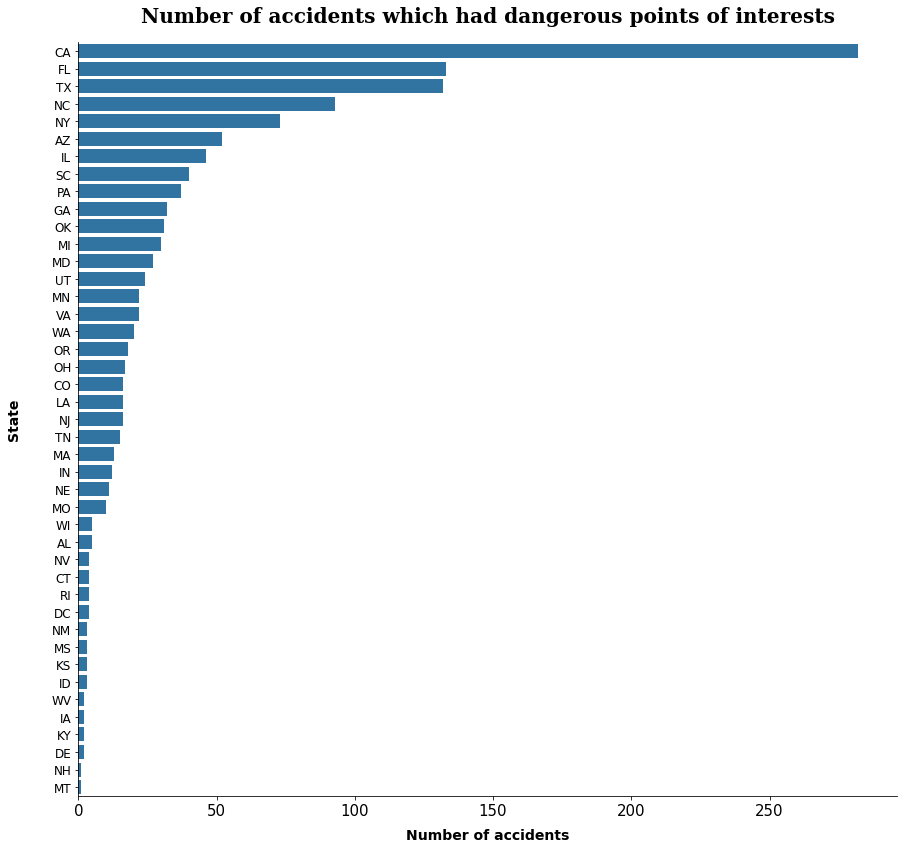

In [35]:
title = "Number of accidents which had dangerous points of interests"
plotbar(danger_pois,'State',default,danger_pois_states.index,'Number of accidents','State',title,'h')

### Conclusions
- The most dangerous points of interests are: Crossing, Traffic signal and junction
- Junction is more prelevent in higlhy severe accidents (3,4) while traffic signals is more prelevent in low severe accidents (1,2)
- other points of interests are mainly irrelevent except for a very small perecentage which occured near stations & stops
- CA, Fl and TX are again the states which had the highest amount of accidents with dangerous points of interests

###  What is the realtionship between time and accidents?

In [36]:
df['day'] = df.Start_Time.dt.day_name()
df['hour'] = df.Start_Time.dt.hour
df['month'] = df.Start_Time.dt.month
df['year'] = df.Start_Time.dt.year
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,time_diff,effect,geometry,day,hour,month,year
0,A-2283743,2,2019-02-19 08:02:58+00:00,2019-02-19 08:32:22+00:00,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,Day,Day,Day,29.0,0.00,POINT (-84.39259 33.72970),Tuesday,8,2,2019
1,A-1567861,2,2017-02-13 20:51:52+00:00,2017-02-13 21:21:39+00:00,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,Night,Night,Night,29.0,0.29,POINT (-83.72710 43.19407),Monday,20,2,2017
2,A-423709,2,2020-05-22 18:20:00+00:00,2020-05-22 19:11:35+00:00,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,Day,Day,Day,51.0,0.00,POINT (-118.40900 34.00007),Friday,18,5,2020
3,A-864136,2,2020-03-03 07:47:18+00:00,2020-03-03 09:17:12+00:00,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,Day,Day,Day,89.0,0.00,POINT (-96.75728 32.67555),Tuesday,7,3,2020
4,A-2792470,2,2020-01-22 08:05:34+00:00,2020-01-22 12:05:34+00:00,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,Day,Day,Day,240.0,0.00,POINT (-121.83106 42.87905),Wednesday,8,1,2020


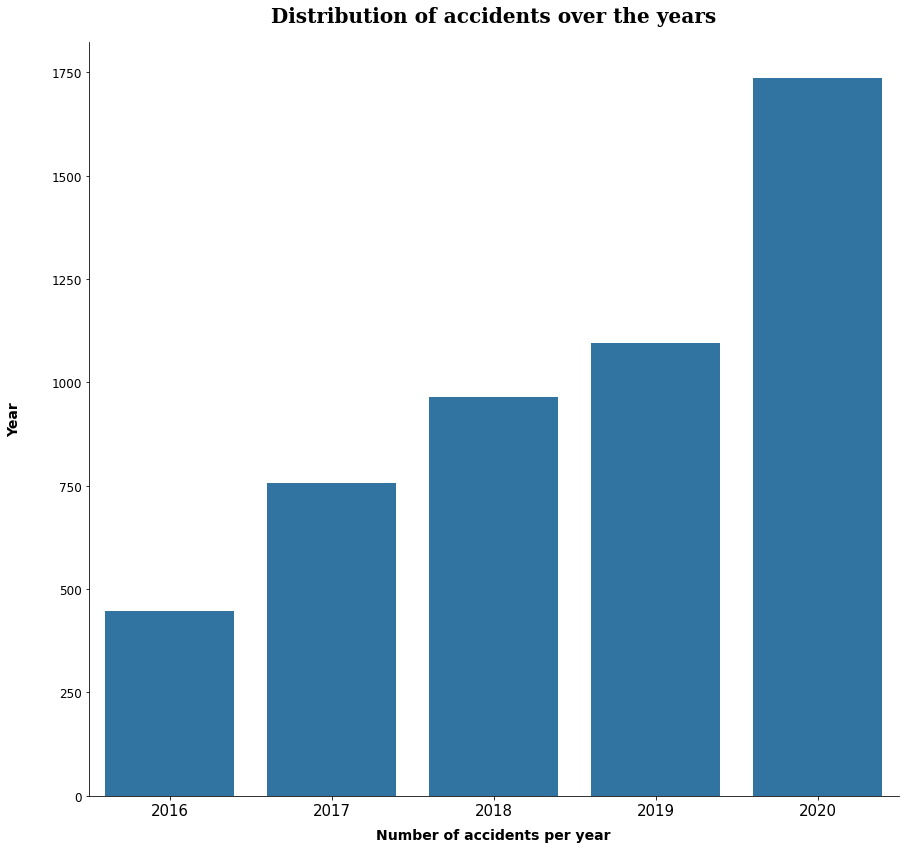

In [37]:
order_year = np.sort(df.year.unique())
title = 'Distribution of accidents over the years'
plotbar(df,'year',default,order_year,'Number of accidents per year','Year',title,'v')

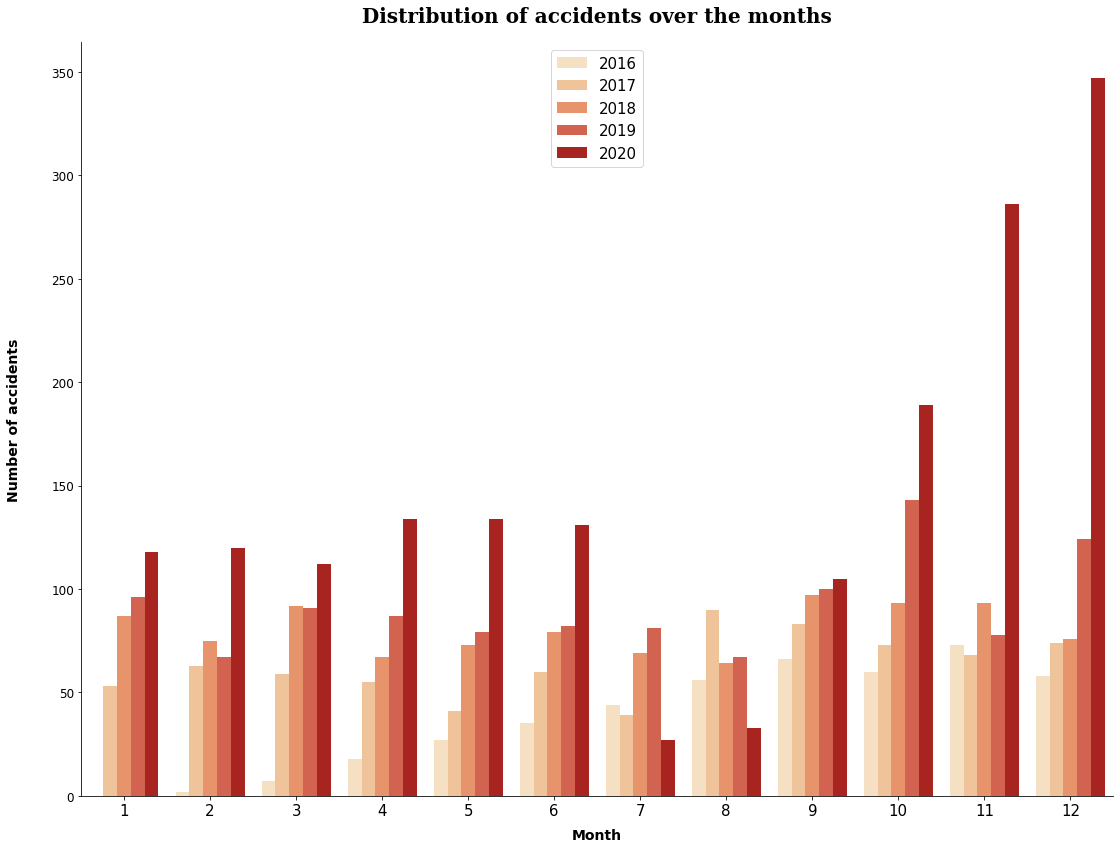

In [38]:
order_month = np.sort(df.month.unique())
title = 'Distribution of accidents over the months'
sns.catplot(data=df,x='month',kind='count',hue='year',color=default,
            order=order_month,palette='OrRd',height=11, aspect=15/11,legend=False)
plt.xlabel('Month',fontsize=14,labelpad=10,weight='bold')
plt.ylabel('Number of accidents',fontsize=14,labelpad=30,weight='bold')
plt.title(title,fontsize=20,pad=20,weight='bold',family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

In [39]:
df.day.value_counts().index

Index(['Tuesday', 'Thursday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Sunday'],
      dtype='object')

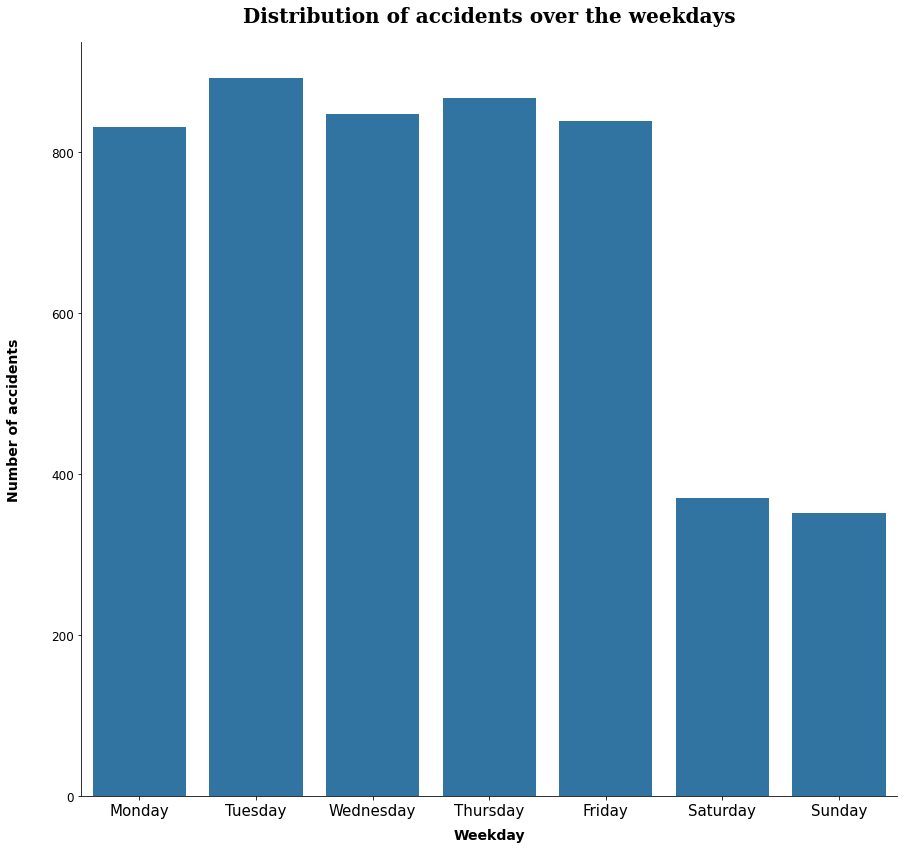

In [40]:
order_Week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
title = 'Distribution of accidents over the weekdays'
plotbar(df,'day',default,order_Week,'Weekday','Number of accidents',title,'v')

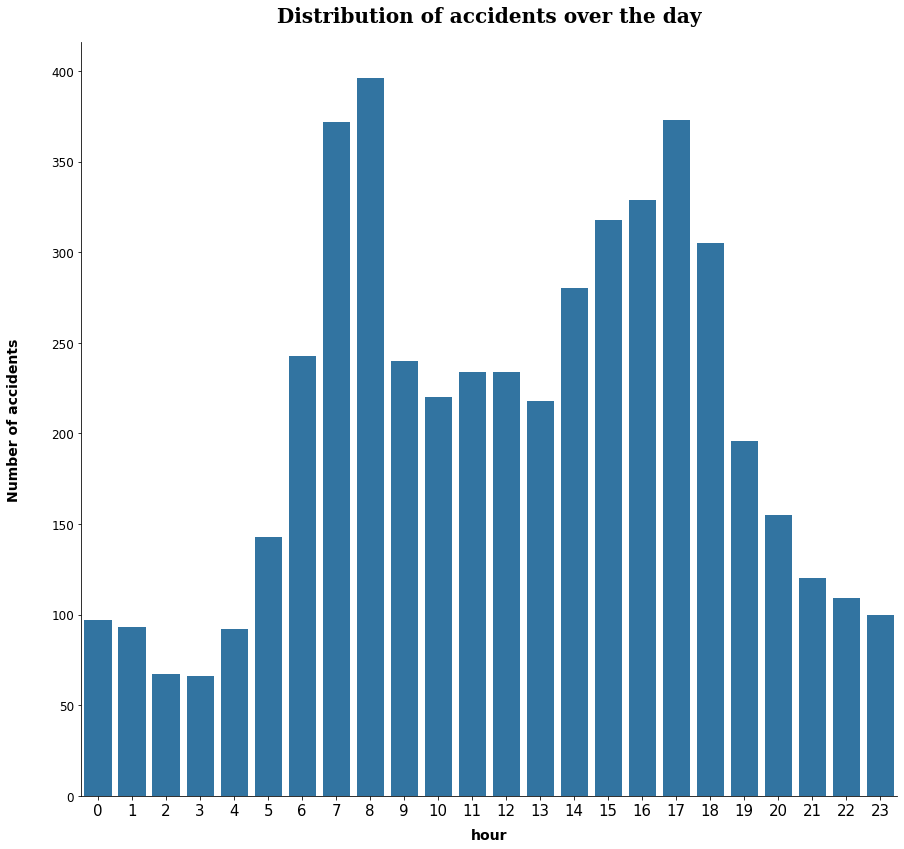

In [41]:
order_hour = np.sort(df.hour.unique())
title = 'Distribution of accidents over the day'
plotbar(df,'hour',default,order_hour,'hour','Number of accidents',title,'v')

### Conclusions
- The number of accidents increase every year (probably due to population increase)
- The increase from 2016 to 2019 was linear but there was a big increase in 2020 specifically in the last 3 months
- Weekends (Saturday and Sunday) have significantly less accidents than weekdays 
- From 9:00 pm till 4:00 am the accidents are relatively low
- In rush hours (6-8 and 14-18) the accidents are very high 
- 10:00 am till 1:00 pm have moderate amount of accidents

## The safest time and place to travel
- Central America has much less accidents than the east and west 
- Places with less junctions, crossings tend to have less accidents
- Weekends are the safest days
- driving outside rush hours (6-8 and 14-18) is much safer